In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the Breast Cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Separate the features and labels
X = df.drop('target', axis=1)
y = df['target']



DNN-2

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
!pip install opencv-python

In [3]:
image = cv2.imread('/kaggle/input/healthy-and-bleached-corals-image-classification/healthy_corals/1007788673_ced6bb5451_o.jpg',cv2.IMREAD_GRAYSCALE)

In [4]:
image.shape

(240, 300)

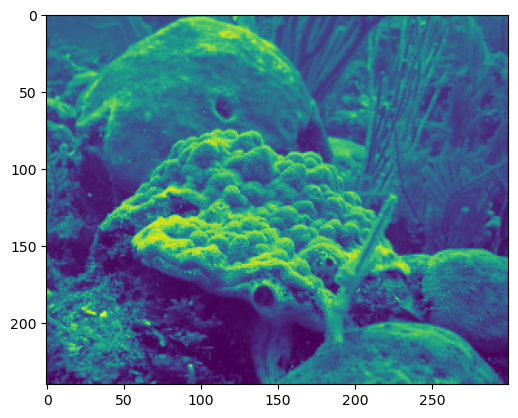

In [5]:
plt.imshow(image)

In [6]:
## import matplotlib.pyplot as plt
import glob
import librosa
import numpy as np
import cv2 
bleached_corals = glob.glob('/kaggle/input/healthy-and-bleached-corals-image-classification/bleached_corals/*.jpg')
healthy_corals = glob.glob('/kaggle/input/healthy-and-bleached-corals-image-classification/healthy_corals/*.jpg')

data = []
labels = []

image_size=(32,32)

for i in bleached_corals:   
    image = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(0)

for i in healthy_corals:   
    image = cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(1)
    
    
X=np.array(data)
y=np.array(labels)
y.shape

(922,)

In [9]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [96]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32)),
    tf.keras.layers.Dense(units=1024, activation='relu'),
    tf.keras.layers.Dense(units=1024, activation='relu'),
    tf.keras.layers.Dense(units=1024, activation='relu'),
   
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the learning rate reduction callback
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitor validation loss for learning rate reduction
    factor=0.8,            # Reduce learning rate by a factor of 0.1
    patience= 10 ,            # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6            # Minimum learning rate
)
# Define the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


# Train the model
history=model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=100, batch_size=64,callbacks=[lr_callback,checkpoint_callback])

Epoch 1/100
10/10 [==============================] - 1s 50ms/step - loss: 154.4333 - accuracy: 0.5501 - val_loss: 33.3015 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/100
10/10 [==============================] - 0s 38ms/step - loss: 31.9577 - accuracy: 0.5093 - val_loss: 14.7482 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/100
10/10 [==============================] - 0s 39ms/step - loss: 5.0412 - accuracy: 0.4907 - val_loss: 1.6579 - val_accuracy: 0.4932 - lr: 0.0010
Epoch 4/100
10/10 [==============================] - 0s 36ms/step - loss: 1.4656 - accuracy: 0.5688 - val_loss: 0.8949 - val_accuracy: 0.5878 - lr: 0.0010
Epoch 5/100
10/10 [==============================] - 0s 44ms/step - loss: 0.8497 - accuracy: 0.6146 - val_loss: 0.8720 - val_accuracy: 0.5270 - lr: 0.0010
Epoch 6/100
10/10 [==============================] - 0s 40ms/step - loss: 0.6316 - accuracy: 0.6503 - val_loss: 0.7145 - val_accuracy: 0.5473 - lr: 0.0010
Epoch 7/100
10/10 [==============================] - 0s 29ms/step

In [12]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1])

In [97]:

best_model = tf.keras.models.load_model('best_model.h5')
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Make predictions on new images
predictions = model.predict(X_test)
predictions

6/6 [==============================] - 0s 7ms/step - loss: 0.7032 - accuracy: 0.6270
Test loss: 0.7032
Test accuracy: 0.6270
6/6 [==============================] - 0s 6ms/step


array([[2.28264274e-09],
       [2.22635549e-06],
       [8.53834391e-01],
       [9.99825239e-01],
       [9.99813676e-01],
       [2.05920602e-04],
       [9.99982655e-01],
       [6.27739131e-01],
       [2.47237762e-03],
       [9.73853096e-02],
       [5.90507269e-01],
       [9.90025103e-01],
       [9.85349178e-01],
       [1.98693424e-01],
       [9.89911079e-01],
       [2.06346303e-01],
       [1.13965034e-04],
       [1.51250989e-03],
       [8.18685055e-01],
       [5.71486354e-01],
       [9.45950684e-04],
       [3.08218170e-02],
       [1.20299580e-06],
       [1.57550403e-10],
       [9.97344971e-01],
       [1.38449207e-01],
       [9.90346789e-01],
       [3.96507569e-02],
       [7.12964611e-05],
       [2.11146042e-01],
       [2.29820311e-01],
       [9.98329937e-01],
       [6.90017536e-04],
       [1.89254922e-03],
       [5.97037470e-05],
       [9.98358428e-01],
       [3.88290942e-01],
       [8.81177559e-02],
       [9.58706081e-01],
       [9.99903619e-01],


In [56]:
predicted_classes = predictions>.5
predicted_classes

array([[False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [57]:
a = 0
for i in range(len(predicted_classes)):
    if predicted_classes[i] == y_test[i]:
        a = a + 1
print(a/len(predicted_classes))
        

0.572972972972973


In [58]:

predicted_classes.flatten()


array([False,  True,  True,  True, False, False, False, False, False,
        True, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False,  True, False,  True, False, False,  True,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
       False, False,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False,  True,  True,  True, False, False,  True,  True,
       False, False, False,  True, False,  True,  True,  True, False,
        True, False, False, False,  True,  True, False, False,  True,
        True, False,

In [59]:
np.sum(predicted_classes.flatten() == y_test)

106

In [60]:
 #Print the predicted class and corresponding true class
for i in range(10):
    print(f"Predicted class: {predicted_classes[i]}, True class: {np.argmax(y_test[i])}")

Predicted class: [False], True class: 0
Predicted class: [ True], True class: 0
Predicted class: [ True], True class: 0
Predicted class: [ True], True class: 0
Predicted class: [False], True class: 0
Predicted class: [False], True class: 0
Predicted class: [False], True class: 0
Predicted class: [False], True class: 0
Predicted class: [False], True class: 0
Predicted class: [ True], True class: 0


6/6 [==============================] - 0s 7ms/step
Classification Report:
               precision    recall  f1-score   support

     bleched       0.61      0.58      0.60       101
     healthy       0.53      0.56      0.54        84

    accuracy                           0.57       185
   macro avg       0.57      0.57      0.57       185
weighted avg       0.58      0.57      0.57       185



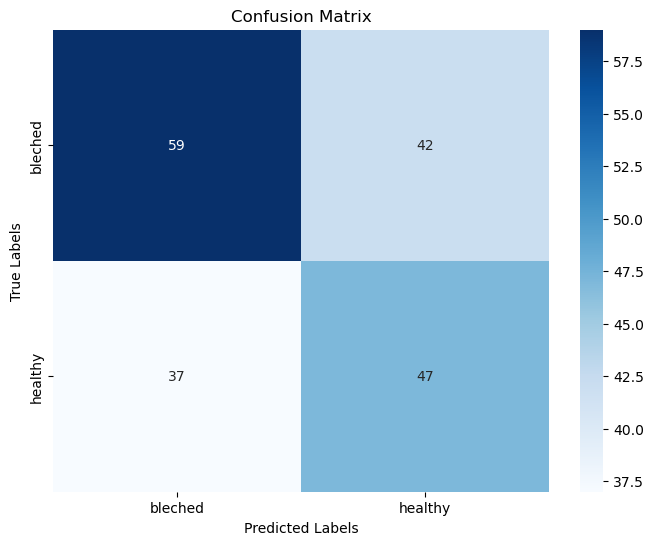

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


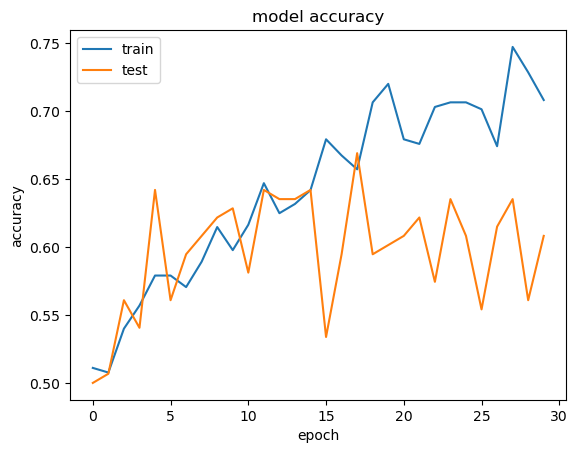

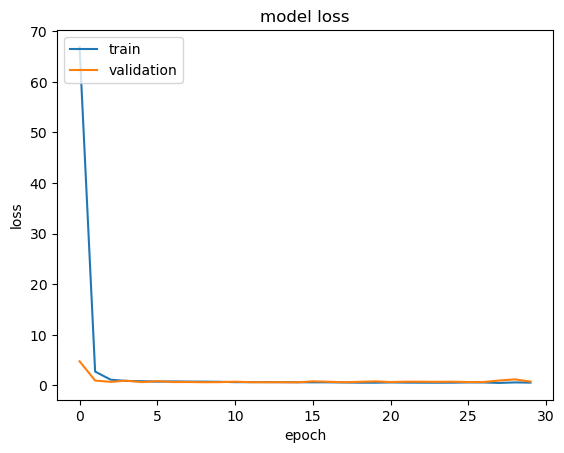

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Get the true labels and predicted probabilities for the test data
# Make predictions on new images
predictions = model.predict(X_test)
predicted_classes = predictions>.5

# Generate the classification report
class_names = list(['bleched','healthy'])
report = classification_report(y_test, predicted_classes , target_names=class_names)
print("Classification Report:\n", report)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes )
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Optimize the model to get at least 70% accuray .you may play with** 
1.   Dynamic learning rate
2.   Save model 
3.   Early stopping 
4.   Drop-Out** 
**for getting higher accuracy**


Residual block

In [113]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense,Activation,Add, Concatenate
from tensorflow.keras.models import Model



# Define the input tensor
inputs = Input(shape=(32,32,64))
x = Conv2D(64, (2, 2), strides=(1, 1), padding='same',activation='relu')(inputs)
x = Conv2D(64, (2, 2), strides=(1, 1), padding='same',activation='relu')(x)
outputs = Add()([x,inputs])


model = Model(inputs=inputs, outputs=outputs)

# # Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print the summary of the model
model.summary()



Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 32, 32, 64)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_26 (Conv2D)             (None, 32, 32, 64)   16448       ['input_13[0][0]']               
                                                                                                  
 conv2d_27 (Conv2D)             (None, 32, 32, 64)   16448       ['conv2d_26[0][0]']              
                                                                                                  
 add_2 (Add)                    (None, 32, 32, 64)   0           ['conv2d_27[0][0]',        

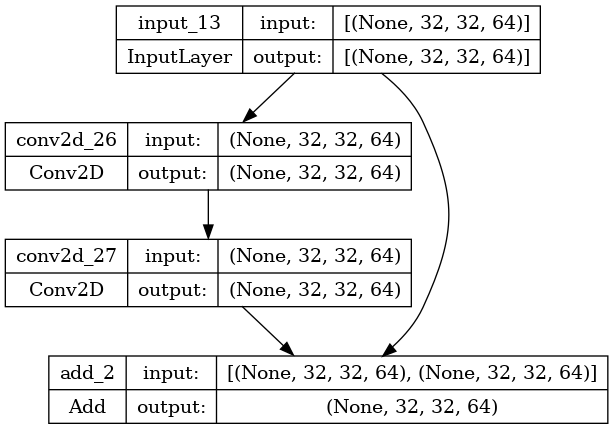

In [114]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [117]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dropout,BatchNormalization, MaxPooling2D, Flatten, Dense,Activation, Concatenate
from tensorflow.keras.models import Model



# Define the input tensor
inputs = Input(shape=(32,32,3))

# # First Convolutional Block
x1 = Conv2D(64, (1, 1), strides=(1, 1), padding='same',activation='relu')(inputs)

x2 = Conv2D(64, (1, 1), strides=(1, 1), padding='same',activation='relu')(inputs)
x2 = Conv2D(64, (3, 3), strides=(1, 1), padding='same',activation='relu')(x2)


x3 = Conv2D(64, (1, 1), strides=(1, 1), padding='same',activation='relu')(inputs)
x3 = Conv2D(64, (5, 5), strides=(1, 1), padding='same',activation='relu')(x3)



x4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(inputs)
x4 = Conv2D(64, (1, 1), strides=(1, 1), padding='same',activation='relu')(x4)

outputs = Concatenate()([x1,x2,x3,x4])

model = Model(inputs=inputs, outputs=outputs)

# # Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print the summary of the model
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_33 (Conv2D)             (None, 32, 32, 64)   256         ['input_15[0][0]']               
                                                                                                  
 conv2d_35 (Conv2D)             (None, 32, 32, 64)   256         ['input_15[0][0]']               
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 32, 32, 3)   0           ['input_15[0][0]']               
                                                                                            

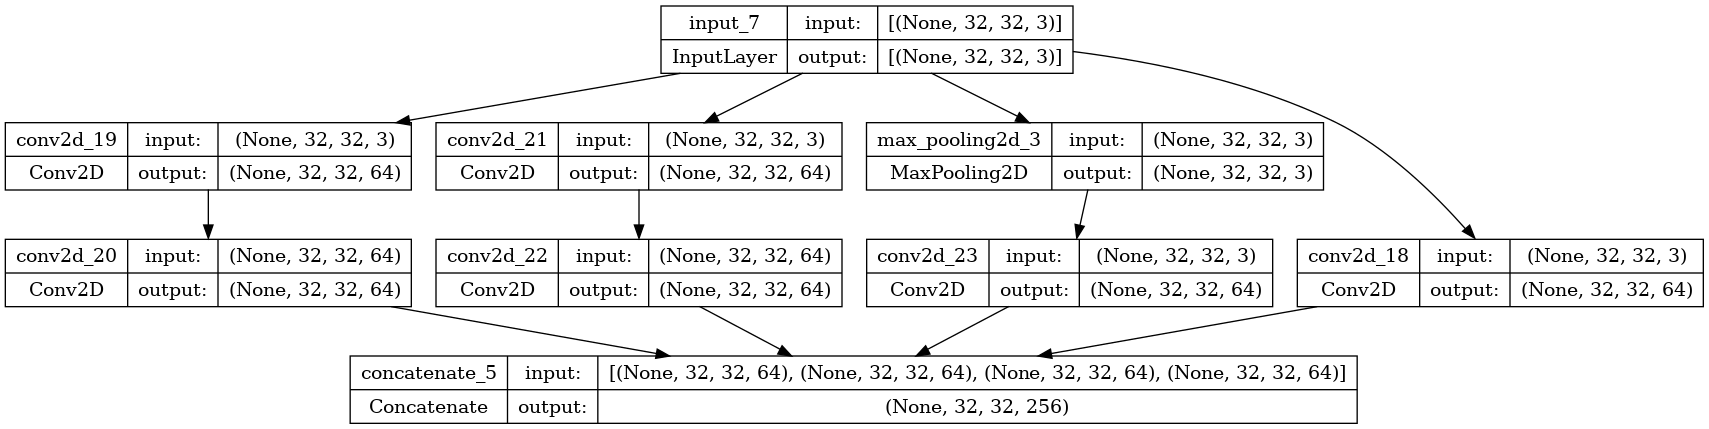

In [106]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [118]:
inputs = Input(shape=(64,64,3))

x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)

x = Conv2D(96, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)

x = Conv2D(96, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)

x = Flatten()(x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.6)(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.15)(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.075)(x)

x = Dense(16, activation='relu')(x)
x = Dropout(0.0325)(x)

outputs = Dense(8, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization_4 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_39 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization_5 (Batc  (None, 64, 64, 64)       256 

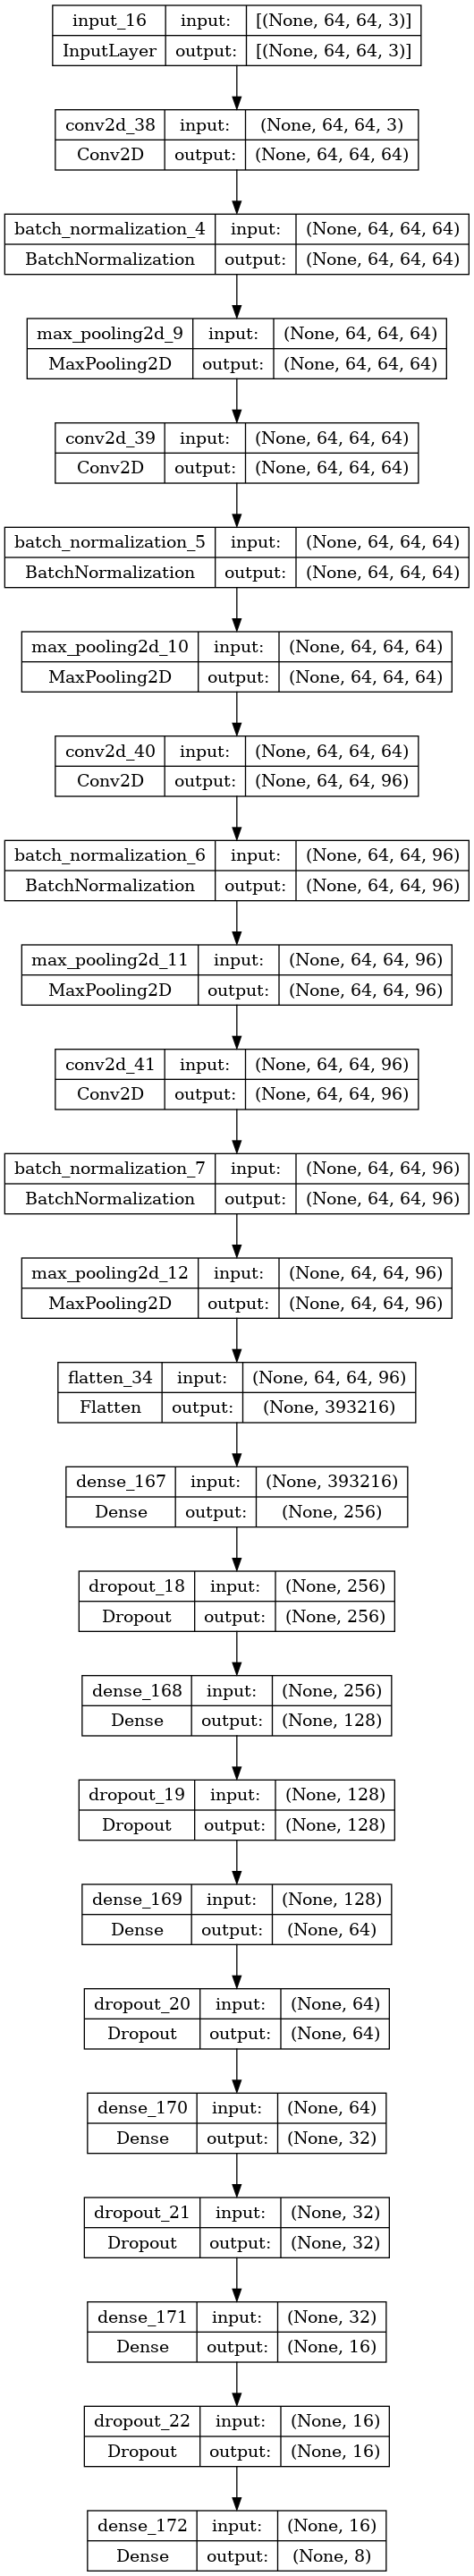

In [119]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)